In [2]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.coordinates import get_sun
from astropy.coordinates import get_moon

Nanshan = EarthLocation(lat=43.473611*u.deg, lon=87.175000 *u.deg, height=2088*u.m)
Beijing = EarthLocation(lat=40*u.deg, lon=116 *u.deg, height=20*u.m)

FAST = EarthLocation(lat=25.6528*u.deg, lon=106.8566 *u.deg, height=20*u.m)

utcoffset = 8*u.hour  # Beijing Time
time = Time('2021-4-2 10:00:00') - utcoffset




In [3]:
NGC6946 = SkyCoord.from_name('NGC6946')
NGC6946

<SkyCoord (ICRS): (ra, dec) in deg
    (308.71805, 60.15367778)>

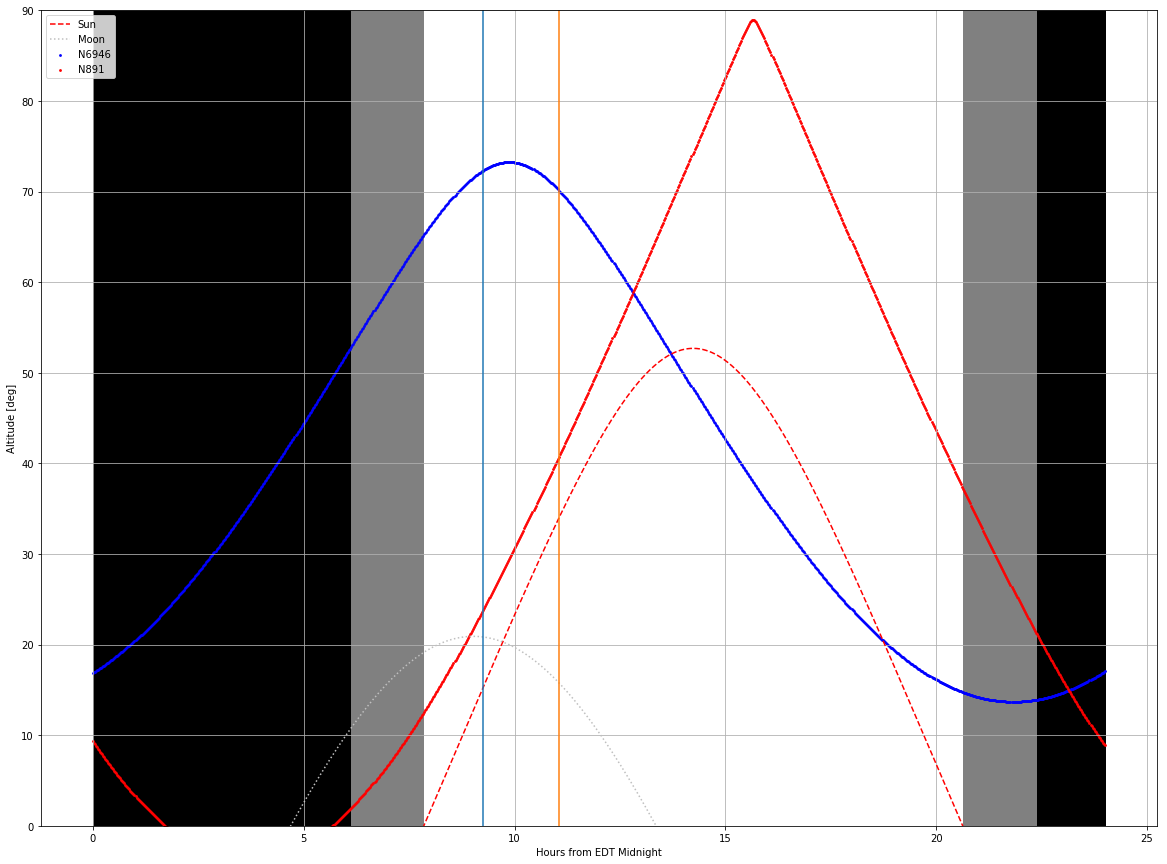

In [7]:
NGC6946 = SkyCoord.from_name('NGC6946')

NGC891 = SkyCoord.from_name('NGC891')

midnight = Time('2021-4-05 0:00:00') - utcoffset
delta_midnight = np.linspace(0, 24, 1000)*u.hour

times_to_midnight = midnight + delta_midnight
frame_to_midnight = AltAz(obstime=times_to_midnight, location=Nanshan)

sunaltazs_to_midnight = get_sun(times_to_midnight).transform_to(frame_to_midnight)
moonaltazs_to_midnight = get_moon(times_to_midnight).transform_to(frame_to_midnight)

NGC6946altazs_to_midnight = NGC6946.transform_to(frame_to_midnight)
NGC891altazs_to_midnight = NGC891.transform_to(frame_to_midnight)


fig = plt.figure(figsize=(20, 15))
plt.plot(np.array(delta_midnight), sunaltazs_to_midnight.alt.deg, color='r', ls='--', label='Sun')
plt.plot(np.array(delta_midnight), moonaltazs_to_midnight.alt.deg, color=[0.75]*3, ls=':', label='Moon')

plt.scatter(np.array(delta_midnight), NGC6946altazs_to_midnight.alt.deg, label='N6946', lw=0, s=8,color='b')
plt.scatter(np.array(delta_midnight), NGC891altazs_to_midnight.alt.deg, label='N891', lw=0, s=8,color='r')


plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg, sunaltazs_to_midnight.alt < -0*u.deg, color='0.5', zorder=0)
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg, sunaltazs_to_midnight.alt < -18*u.deg, color='k', zorder=0)
plt.legend(loc='upper left')
#plt.xlim(-6, 10)
#plt.xticks((np.arange(8)*2-6))
plt.ylim(0, 90)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Altitude [deg]')

plt.plot([9.25, 9.25], [0,90])
plt.plot([11.+4./60, 11.+4./60], [0,90])


plt.grid()